# IF3170 Artificial Intelligence | Tugas Besar 2

Group Number: 11

Group Members:
- Yasmin Farisah Salma (13522140)
- Ikhwan Al Hakim (13522147)
- Axel Santadi Warih (13522155)
- Mohammad Akmal Ramadan (13522161)

## Import Libraries

In [1]:
import gc
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import skew

from scipy import stats
pd.set_option("display.max.columns", None)

import seaborn as sns
sns.set(style="white", font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0", "figure.facecolor":"#FFFAF0"})
sns.set_context("poster", font_scale=.7)

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,silhouette_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

### Training Data


In [2]:
# # training data
# content_features = pd.read_csv('https://drive.google.com/uc?id=1pK_OzvxCx37YWjJYLzD5QF-_86C4zTI2')
# time_features = pd.read_csv('https://drive.google.com/uc?id=18-GW_dLc-YSCESvsBsCqPu4Gh0cNeMAd')
# flow_features = pd.read_csv('https://drive.google.com/uc?id=1C476oWNEZiwGkNdNVEuWs1sxCKppiB0t')
# basic_features = pd.read_csv('https://drive.google.com/uc?id=1PfNfeFpdtBQOAwcdcTZT2qGte-DxIy9X')
# additional_features = pd.read_csv('https://drive.google.com/uc?id=11jPrcn0KCu-0KYSZVhmO4Tz4w1UKOsk7')
# labels = pd.read_csv('https://drive.google.com/uc?id=11yRTD701ZH6km-tPEAMWFwynnd4rgpwc')

# train_data = content_features.merge(time_features, on='id') \
#                        .merge(flow_features, on='id') \
#                        .merge(basic_features, on='id') \
#                        .merge(additional_features, on='id') \
#                        .merge(labels, on='id')

# print("Train data:")
# train_data.head()

# training data
content_features = pd.read_csv('./data/content_features_train.csv')
time_features = pd.read_csv('./data/time_features_train.csv')
flow_features = pd.read_csv('./data/flow_features_train.csv')
basic_features = pd.read_csv('./data/basic_features_train.csv')
additional_features = pd.read_csv('./data/additional_features_train.csv')
labels = pd.read_csv('./data/labels_train.csv')

train_data = content_features.merge(time_features, on='id') \
                       .merge(flow_features, on='id') \
                       .merge(basic_features, on='id') \
                       .merge(additional_features, on='id') \
                       .merge(labels, on='id')

print("Train data:")
train_data.head()

Train data:


,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,id,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,255,255,621772692,2202533631,43,43,0,0,1,30.177547,11.830604,24.295600,8.375000,0.000000,0.000000,0.000000,tcp,FIN,0.121478,258,172,252,254,0,0,-,14158.942380,8495.365234,6,4,0,0,0,0,0,1,1,1,1,1,1,1,Normal,0
1,255,255,1417884146,3077387971,52,1106,0,0,2,61.426934,1387.778330,49.915000,15.432865,0.000000,0.000000,0.000000,tcp,FIN,0.649902,734,42014,62,252,2,17,-,8395.112305,503571.312500,14,38,0,1,0,0,0,43,6,1,1,1,1,2,Normal,0
2,255,255,2116150707,2963114973,46,824,0,0,3,17179.586860,11420.926230,231.875571,102.737203,0.111897,0.061458,0.050439,tcp,FIN,1.623129,364,13186,62,252,1,6,-,1572.271851,60929.230470,8,16,0,1,0,0,0,7,6,2,2,1,1,3,Normal,0
3,255,255,1107119177,1047442890,52,64,0,0,4,259.080172,4991.784669,152.876547,90.235726,0.000000,0.000000,0.000000,tcp,FIN,1.681642,628,770,62,252,1,3,ftp,2740.178955,3358.622070,12,12,0,1,0,1,1,1,1,2,2,1,1,3,Normal,0
4,255,255,2436137549,1977154190,53,45,0,0,5,2415.837634,115.807000,47.750333,75.659602,0.128381,0.071147,0.057234,tcp,FIN,0.449454,534,268,254,252,2,1,-,8561.499023,3987.059814,10,6,0,1,0,0,0,43,39,2,2,2,1,40,Normal,0


### Testing Data

In [3]:
# # test data
# additional_features_test = pd.read_csv("https://drive.google.com/uc?id=1_Hr0z5Uf773pCEhZMLWezuVmHwXktiAb")
# basic_features_test = pd.read_csv("https://drive.google.com/uc?id=19MpLLBpvnhPQSNJLlwOxsePzh5kykrCK")
# content_features_test = pd.read_csv("https://drive.google.com/uc?id=1-z-99tuGIsGQDMt5o04XsU7fCaK2Rbl2")
# flow_features_test = pd.read_csv("https://drive.google.com/uc?id=1RusfcezFvLbqtFJ_GhikRBe7PEl2H128")
# time_features_test = pd.read_csv("https://drive.google.com/uc?id=1WBu9tX_JgmBrs2ln-O3X9_xdziQ7y9JF")

# test_data = content_features_test.merge(time_features_test, on='id') \
#                        .merge(flow_features_test, on='id') \
#                        .merge(basic_features_test, on='id') \
#                        .merge(additional_features_test, on='id')

# print("Test data:")
# test_data.head()

additional_features_test = pd.read_csv("./data/additional_features_test.csv")
basic_features_test = pd.read_csv("./data/basic_features_test.csv")
content_features_test = pd.read_csv("./data/content_features_test.csv")
flow_features_test = pd.read_csv("./data/flow_features_test.csv")
time_features_test = pd.read_csv("./data/time_features_test.csv")

test_data = content_features_test.merge(time_features_test, on='id') \
                       .merge(flow_features_test, on='id') \
                       .merge(basic_features_test, on='id') \
                       .merge(additional_features_test, on='id')

print("Test data:")
test_data.head()

Test data:


,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,id,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,255.0,255.0,2.914597e+08,3.441056e+09,53.0,45.0,0.0,0.0,0,2737.954123,118.833969,48.756556,76.593602,0.165117,0.072001,0.093116,tcp,FIN,0.454980,534.0,268.0,254.0,252.0,2.0,1.0,-,8457.514648,3938.634766,10.0,6.0,0.0,1.0,0.0,0.0,0.0,5.0,5.0,2.0,2.0,2.0,1.0,2.0
1,255.0,255.0,2.288130e+09,3.754733e+07,632.0,45.0,0.0,0.0,1,2938.299144,165.780563,49.812539,109.557602,0.223604,0.100248,0.123356,tcp,FIN,0.648037,8854.0,268.0,254.0,252.0,4.0,1.0,-,101500.375000,2765.274170,14.0,6.0,0.0,1.0,0.0,NaN,0.0,6.0,6.0,1.0,1.0,1.0,1.0,5.0
2,255.0,255.0,2.901133e+09,1.323903e+09,215.0,54.0,0.0,0.0,2,4287.453629,129.471406,69.765530,94.395906,0.113189,0.082498,0.030691,tcp,FIN,1.120856,3440.0,642.0,254.0,252.0,5.0,3.0,-,23018.121090,4203.929688,16.0,12.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,1.0,2.0,1.0,1.0,4.0
3,0.0,0.0,0.000000e+00,NaN,NaN,0.0,0.0,0.0,3,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,udp,INT,0.000001,244.0,0.0,254.0,NaN,0.0,0.0,NaN,NaN,0.000000,2.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,4.0,2.0,4.0,2.0,1.0,4.0
4,255.0,255.0,2.457682e+09,3.533657e+08,96.0,91.0,0.0,0.0,4,1119.063538,26.748141,17.628799,15.543294,0.000655,0.000526,0.000129,tcp,FIN,0.264763,1540.0,1644.0,31.0,29.0,4.0,4.0,-,43631.472660,46924.984380,16.0,18.0,NaN,0.0,NaN,0.0,0.0,13.0,11.0,10.0,7.0,6.0,1.0,7.0


# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

## Data Size


In [4]:
print("Size of the dataset: ", train_data.shape)

Size of the dataset:  (175341, 44)


## Data Info

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   swin               175341 non-null  int64  
 1   dwin               175341 non-null  int64  
 2   stcpb              175341 non-null  int64  
 3   dtcpb              175341 non-null  int64  
 4   smean              175341 non-null  int64  
 5   dmean              175341 non-null  int64  
 6   trans_depth        175341 non-null  int64  
 7   response_body_len  175341 non-null  int64  
 8   id                 175341 non-null  int64  
 9   sjit               175341 non-null  float64
 10  djit               175341 non-null  float64
 11  sinpkt             175341 non-null  float64
 12  dinpkt             175341 non-null  float64
 13  tcprtt             175341 non-null  float64
 14  synack             175341 non-null  float64
 15  ackdat             175341 non-null  float64
 16  pr

## Column Data Types

In [6]:
column_data_types = train_data.dtypes

numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 40 Numerical Columns in dataset
There are 4 Categorical Columns in dataset


## Statistics for Numerical Features

In [7]:
numerical_features = train_data.select_dtypes(include=['float64', 'int64'])

stats = numerical_features.agg(['min', 'max', 'mean', 'median', 'std']).transpose()
stats.columns = ['Minimum', 'Maximum', 'Mean', 'Median', 'STD']

stats.style.set_caption("Statistics of Numerical Features")

,Minimum,Maximum,Mean,Median,STD
swin,0.000000,255.000000,116.257339,0.000000,127.001024
dwin,0.000000,255.000000,115.013625,0.000000,126.886530
stcpb,0.000000,4294958913.000000,969250421.910511,0.000000,1355264249.263036
dtcpb,0.000000,4294881924.000000,968877027.071153,0.000000,1353999546.225652
smean,28.000000,1504.000000,136.751769,73.000000,204.677360
dmean,0.000000,1458.000000,124.173382,44.000000,258.317056
trans_depth,0.000000,172.000000,0.105982,0.000000,0.776911
response_body_len,0.000000,6558056.000000,2144.291655,0.000000,54207.967294
id,1.000000,175341.000000,87671.000000,87671.000000,50616.731112
sjit,0.000000,1460480.016000,4976.254226,0.000000,44965.846519


## Descriptive Analysis in Numerical Data

In [8]:
round(train_data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
swin,175341.0,1.162600e+02,1.270000e+02,0.0,0.00,0.00,2.550000e+02,2.550000e+02
dwin,175341.0,1.150100e+02,1.268900e+02,0.0,0.00,0.00,2.550000e+02,2.550000e+02
stcpb,175341.0,9.692504e+08,1.355264e+09,0.0,0.00,0.00,1.916651e+09,4.294959e+09
dtcpb,175341.0,9.688770e+08,1.354000e+09,0.0,0.00,0.00,1.913675e+09,4.294882e+09
smean,175341.0,1.367500e+02,2.046800e+02,28.0,57.00,73.00,1.000000e+02,1.504000e+03
dmean,175341.0,1.241700e+02,2.583200e+02,0.0,0.00,44.00,8.900000e+01,1.458000e+03
trans_depth,175341.0,1.100000e-01,7.800000e-01,0.0,0.00,0.00,0.000000e+00,1.720000e+02
response_body_len,175341.0,2.144290e+03,5.420797e+04,0.0,0.00,0.00,0.000000e+00,6.558056e+06
id,175341.0,8.767100e+04,5.061673e+04,1.0,43836.00,87671.00,1.315060e+05,1.753410e+05
sjit,175341.0,4.976250e+03,4.496585e+04,0.0,0.00,0.00,2.513300e+03,1.460480e+06


## Descriptive Analysis in Categorical Data

In [9]:
train_data.describe(include="O").T

,count,unique,top,freq
proto,175341,133,tcp,79946
state,175341,9,INT,82275
service,175341,13,-,94168
attack_cat,175341,10,Normal,56000


## Unique Values for Categorical Features

In [10]:
print("Number of unique values in each column for categorical columns:\n")
for col in train_data.select_dtypes(include=['category', 'object']).columns:
    unique_count = train_data[col].nunique()
    print(f"Column '{col}' has {unique_count} unique values.")

    print(f"\nValue counts in column '{col}':")
    print(train_data[col].value_counts())
    print("-" * 50)

Number of unique values in each column for categorical columns:

Column 'proto' has 133 unique values.

Value counts in column 'proto':
proto
tcp       79946
udp       63283
unas      12084
arp        2859
ospf       2595
          ...  
rdp          98
netblt       98
igmp         18
icmp         15
rtp           1
Name: count, Length: 133, dtype: int64
--------------------------------------------------
Column 'state' has 9 unique values.

Value counts in column 'state':
state
INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
ECO       12
PAR        1
URN        1
no         1
Name: count, dtype: int64
--------------------------------------------------
Column 'service' has 13 unique values.

Value counts in column 'service':
service
-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: c

## Unique Values for All Attributes

In [11]:
cols = train_data.columns

for column in cols:
    print('Unique values of ',column , 'with dtype',train_data[column].dtype, 'have total values',train_data[column].nunique(),'->',  train_data[column].unique())
    print('-'*100)

Unique values of  swin with dtype int64 have total values 13 -> [255   0  31 232  14 192 103  45  87 172 168 167  42]
----------------------------------------------------------------------------------------------------
Unique values of  dwin with dtype int64 have total values 7 -> [255   0 244  70  48  37  40]
----------------------------------------------------------------------------------------------------
Unique values of  stcpb with dtype int64 have total values 75265 -> [ 621772692 1417884146 2116150707 ...    5604755 1932059121 3518776216]
----------------------------------------------------------------------------------------------------
Unique values of  dtcpb with dtype int64 have total values 75089 -> [2202533631 3077387971 2963114973 ...  575257391 2472223109 3453092386]
----------------------------------------------------------------------------------------------------
Unique values of  smean with dtype int64 have total values 1357 -> [  43   52   46 ... 1440 1344  688]
--

# 1. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

#### Checking Missing Data

In [12]:
missing_data = train_data.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(train_data))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
swin,0,0.0
dwin,0,0.0
stcpb,0,0.0
dtcpb,0,0.0
smean,0,0.0
dmean,0,0.0
trans_depth,0,0.0
response_body_len,0,0.0
id,0,0.0
sjit,0,0.0


### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

#### Checking for Outliers

In [13]:
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
len(numerical_columns)

40

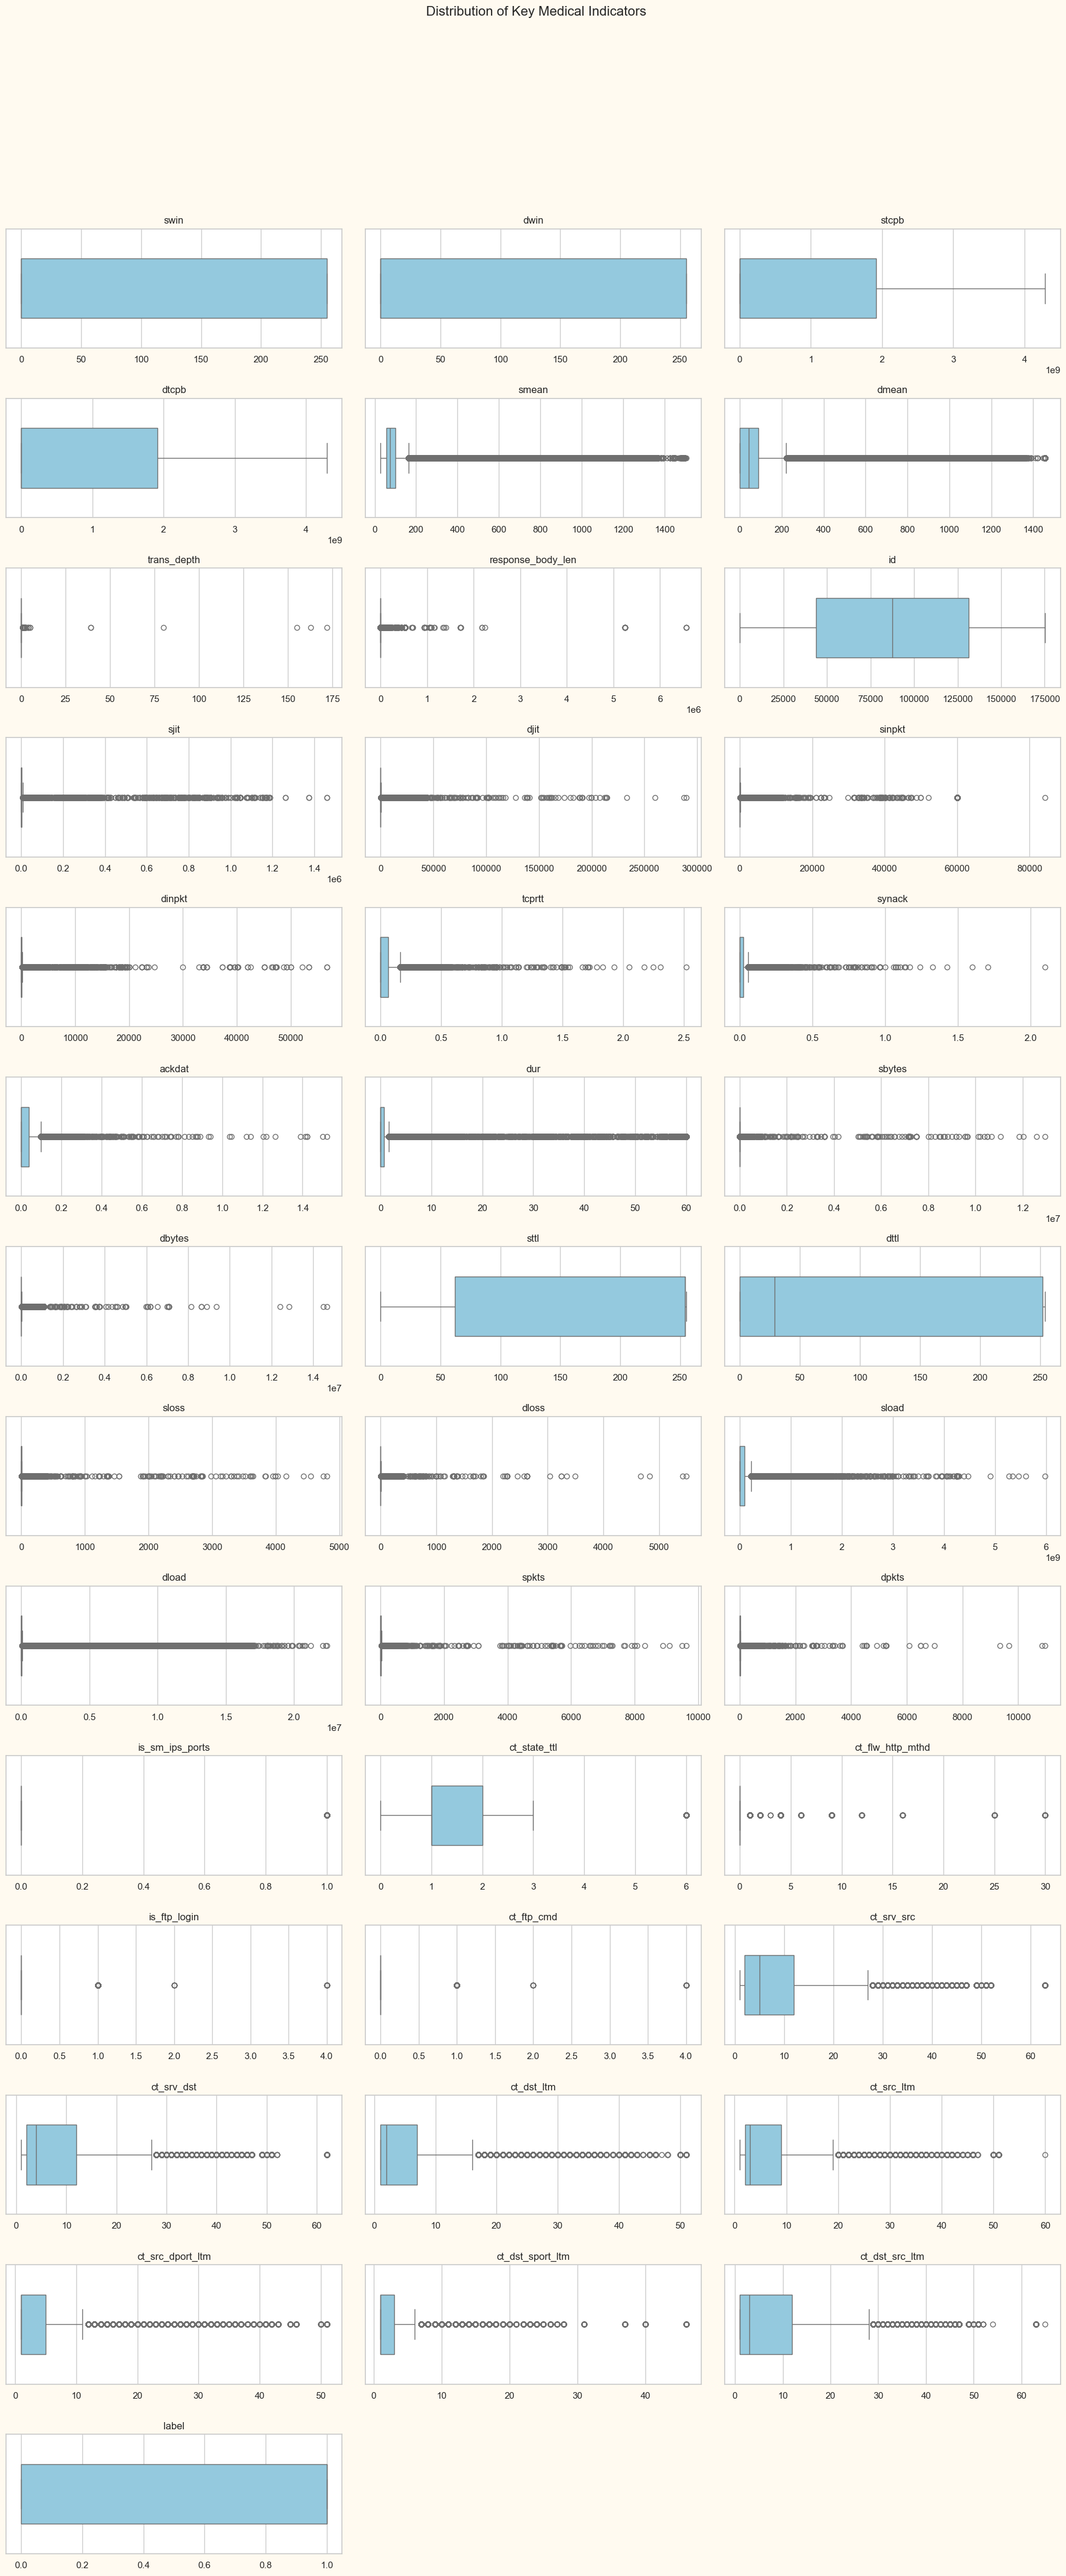

In [14]:
num_columns = len(numerical_columns)
num_cols = 3
num_rows = math.ceil(num_columns / num_cols)

plt.figure(figsize=(18, num_rows * 3))

sns.set_palette("husl")
sns.set(style="whitegrid")

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=train_data[col], color='skyblue', width=0.5)
    plt.title(col)
    plt.xlabel("")

plt.suptitle("Distribution of Key Medical Indicators", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [15]:
# Extract numerical columns
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Columns to exclude
exclude_columns = ['swim', 'dwim', 'stcpb', 'dtcpb', 'sttl', 'dttl']

# Filter out the columns to exclude
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

In [16]:
for col in numerical_columns:
    median_value = train_data[col].median()
    lower_bound = train_data[col].quantile(0.25) - 1.5 * (train_data[col].quantile(0.75) - train_data[col].quantile(0.25))
    upper_bound = train_data[col].quantile(0.75) + 1.5 * (train_data[col].quantile(0.75) - train_data[col].quantile(0.25))
    train_data[col] = train_data[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

**Visualising Data Distribution and Skewness**

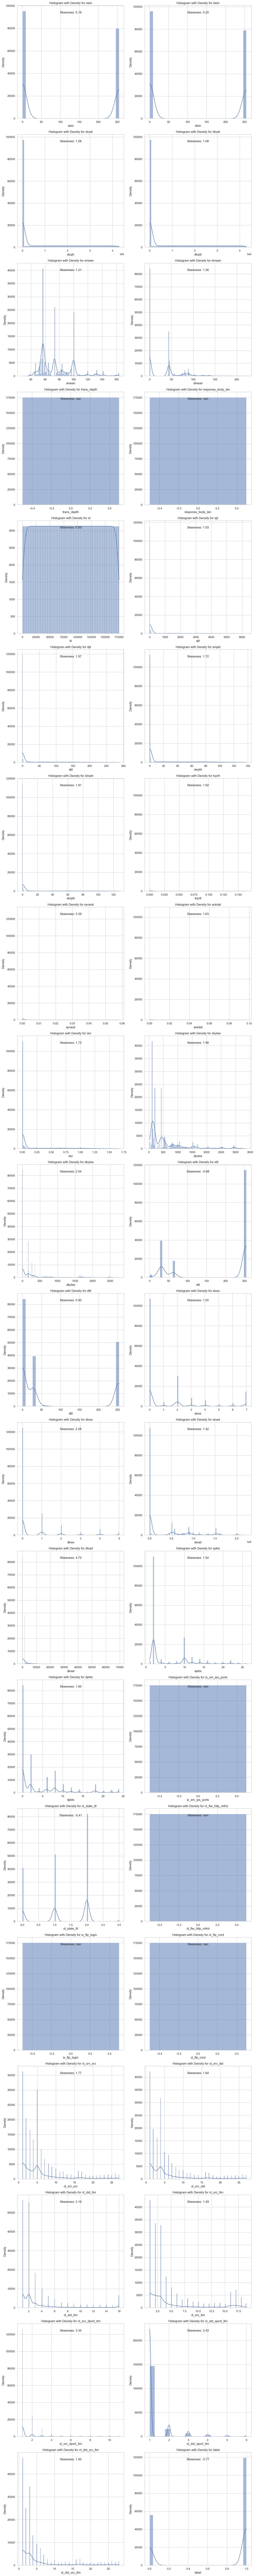

In [17]:
# Set the figure size and arrange plots horizontally in pairs
numerical_features = train_data.select_dtypes(include=['number']).columns
num_plots = len(numerical_features)
num_rows = (num_plots + 1) // 2  # Ensure enough rows to accommodate all features
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 7*num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the selected columns and create histograms with density
for i, col in enumerate(numerical_features):
    sns.histplot(data=train_data, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with Density for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

    # Calculate skewness
    skewness = skew(train_data[col].dropna())
    axes[i].text(0.5, 0.95, f'Skewness: {skewness:.2f}', horizontalalignment='center', verticalalignment='top', transform=axes[i].transAxes)

# Remove any empty subplots if the number of features is odd
if num_plots % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [18]:
def transform(X):
    eps = 1e-5
    numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

    for col in numerical_columns:
        skewness = skew(X[col])
        if skewness > 0:  # Positive skew
            X[col] = np.log(X[col] + eps)
        elif skewness < 0:  # Negative skew
            X[col] = np.log(np.max(X[col] + eps) - X[col] + eps)
        else:  # Symmetric or zero skew
            X[col] = X[col]  # No transformation needed

    return X

In [19]:
transform(train_data)

,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,id,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,5.541264,5.541264,20.248085,21.512874,3.761200,3.761200,0.0,0.0,1,3.407099,2.470691,3.190296,2.125252,-11.512925,-11.512925,-11.512925,tcp,FIN,-2.107940,5.552960,5.147495,1.098619,5.537334,-11.512925,-11.512925,-,9.558102,9.047276,1.791761,1.386297,0.0,1.098619,0.0,0.0,0.0,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,Normal,0.000020
1,5.541264,5.541264,21.072432,21.847347,3.951244,3.784190,0.0,0.0,2,4.117849,-11.512925,3.910322,2.736500,-11.512925,-11.512925,-11.512925,tcp,FIN,-0.430918,6.598509,5.099866,5.262690,5.529429,0.693152,-11.512925,-,9.035405,7.277263,2.639058,0.693152,0.0,0.693157,0.0,0.0,0.0,1.609440,1.791761,0.000010,0.000010,0.000010,0.000010,0.693152,Normal,0.000020
2,5.541264,5.541264,21.472865,21.809507,3.828642,3.784190,0.0,0.0,3,-11.512925,-11.512925,-1.273884,4.632174,-2.190087,-11.512925,-2.986792,tcp,FIN,0.484362,5.897154,5.099866,5.262690,5.529429,0.000010,-11.512925,-,7.360277,11.017468,2.079443,2.772589,0.0,0.693157,0.0,0.0,0.0,1.945912,1.791761,0.693152,0.693152,0.000010,0.000010,1.098616,Normal,0.000020
3,5.541264,5.541264,20.825027,20.769618,3.951244,4.158883,0.0,0.0,4,5.557138,-11.512925,-1.273884,4.502426,-11.512925,-11.512925,-11.512925,tcp,FIN,-6.442764,6.442540,6.646391,5.262690,5.529429,0.000010,1.098616,ftp,7.915779,8.119286,2.484907,2.484907,0.0,0.693157,0.0,0.0,0.0,0.000010,0.000010,0.693152,0.693152,0.000010,0.000010,1.098616,Normal,0.000020
4,5.541264,5.541264,21.613680,21.404924,3.970292,3.806663,0.0,0.0,5,7.789801,4.751925,3.865986,4.326244,-2.052675,-11.512925,-2.860432,tcp,FIN,-0.799700,6.280396,5.590987,0.000020,5.529429,0.693152,0.000010,-,9.055031,8.290809,2.302586,1.791761,0.0,0.693157,0.0,0.0,0.0,1.609440,1.386297,0.693152,0.693152,0.693152,0.000010,1.098616,Normal,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,-11.512925,-11.512925,-11.512925,-11.512925,4.043051,-11.512925,0.0,0.0,175337,-11.512925,-11.512925,-4.709420,-11.512925,-11.512925,-11.512925,-11.512925,udp,INT,-10.871072,4.736199,-11.512925,0.000020,-11.512925,-11.512925,-11.512925,dns,17.740779,-11.512925,0.693152,-11.512925,0.0,0.000020,0.0,0.0,0.0,3.178054,3.178054,0.693152,1.098616,0.000010,0.000010,3.178054,Generic,-10.819778
175337,5.541264,5.541264,21.981379,21.962536,4.127135,3.784190,0.0,0.0,175338,8.221766,4.788972,3.996366,4.204403,-2.308100,-3.299408,-2.771709,tcp,FIN,-0.681669,6.429719,5.869297,0.000020,5.529429,0.693152,0.000010,-,9.085490,8.497703,2.302586,2.079443,0.0,0.693157,0.0,0.0,0.0,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.693152,Shellcode,-10.819778
175338,-11.512925,-11.512925,-11.512925,-11.512925,4.043051,-11.512925,0.0,0.0,175339,-11.512925,-11.512925,-4.709420,-11.512925,-11.512925,-11.512925,-11.512925,udp,INT,-10.871072,4.736199,-11.512925,0.000020,-11.512925,-11.512925,-11.512925,dns,17.740779,-11.512925,0.693152,-11.512925,0.0,0.000020,0.0,0.0,0.0,2.484907,2.484907,1.098616,1.098616,1.098616,1.098616,2.564950,Generic,-10.819778
175339,-11.512925,-11.512925,-11.512925,-11.512925,4.043051,-11.512925,0.0,0.0,175340,-11.512925,-11.512925,-4.709420,-11.512925,-11.512925,-11.512925,-11.512925,udp,INT,-10.871072,4.736199,-11.512925,0.000020,-11.512925,-11.512925,-11.512925,dns,17.740779,-11.512925,0.693152,-11.512925,0.0,0.000020,0.0,0.0,0.0,1.609440,1.386297,0.693152,1.098616,0.000010,0.000010,1.098616,Generic,-10.819778


**Visualising Class Distribution**

In [20]:
def pie_bar_plot(df, col):
    plt.figure(figsize=(10, 6))

    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()

    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=None, autopct="", startangle=90, colors=colors)
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    plt.show()

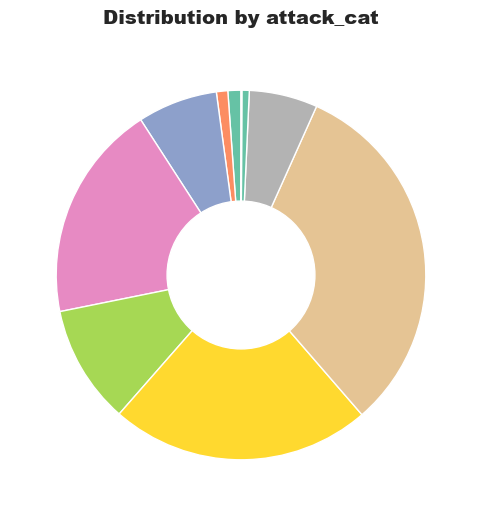

In [21]:
pie_bar_plot(train_data, 'attack_cat')

In [22]:
# Print class distribution before resampling
print("Before resampling:", train_data['attack_cat'].value_counts())
print()

Before resampling: attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64



### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

#### Checking Duplicates

In [23]:
print("Duplicates in train data: ",train_data.duplicated().sum())

Duplicates in train data:  0


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [24]:
def generate_features(df):

    # Ratios
    df['byte_ratio'] = df['sbytes'] / (df['dbytes'] + 1)
    df['pkt_ratio'] = df['spkts'] / (df['dpkts'] + 1)
    df['load_ratio'] = df['sload'] / (df['dload'] + 1)
    df['jit_ratio'] = df['sjit'] / (df['djit'] + 1)
    df['inter_pkt_ratio'] = df['sinpkt'] / (df['dinpkt'] + 1)
    df['tcp_setup_ratio'] = df['tcprtt'] / (df['synack'] + df['ackdat'] + 1)

    # Aggregate Features
    df['total_bytes'] = df['sbytes'] + df['dbytes']
    df['total_pkts'] = df['spkts'] + df['dpkts']
    df['total_load'] = df['sload'] + df['dload']
    df['total_jitter'] = df['sjit'] + df['djit']
    df['total_inter_pkt'] = df['sinpkt'] + df['dinpkt']
    df['total_tcp_setup'] = df['tcprtt'] + df['synack'] + df['ackdat']

    # Interaction Features
    df['byte_pkt_interaction_src'] = df['sbytes'] * df['spkts']
    df['byte_pkt_interaction_dst'] = df['dbytes'] * df['dpkts']
    df['load_jit_interaction_src'] = df['sload'] * df['sjit']
    df['load_jit_interaction_dst'] = df['dload'] * df['djit']
    df['pkt_jit_interaction_src'] = df['spkts'] * df['sjit']
    df['pkt_jit_interaction_dst'] = df['dpkts'] * df['djit']

    # Statistical Features
    df['mean_pkt_size'] = df['smean'] + df['dmean']
    df['tcp_seq_diff'] = df['stcpb'] - df['dtcpb']

    return df

In [25]:
generate_features(train_data)

,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,id,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label,byte_ratio,pkt_ratio,load_ratio,jit_ratio,inter_pkt_ratio,tcp_setup_ratio,total_bytes,total_pkts,total_load,total_jitter,total_inter_pkt,total_tcp_setup,byte_pkt_interaction_src,byte_pkt_interaction_dst,load_jit_interaction_src,load_jit_interaction_dst,pkt_jit_interaction_src,pkt_jit_interaction_dst,mean_pkt_size,tcp_seq_diff
0,5.541264,5.541264,20.248085,21.512874,3.761200,3.761200,0.0,0.0,1,3.407099,2.470691,3.190296,2.125252,-11.512925,-11.512925,-11.512925,tcp,FIN,-2.107940,5.552960,5.147495,1.098619,5.537334,-11.512925,-11.512925,-,9.558102,9.047276,1.791761,1.386297,0.0,1.098619,0.0,0.0,0.0,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,Normal,0.000020,0.903288,0.750854,0.951313,0.981677,1.020812,0.522701,10.700454,3.178058,18.605378,5.877789,5.315548,-34.538776,9.949577,7.135956,32.565394,22.353020,6.104707,3.425111,7.522401,-1.264789
1,5.541264,5.541264,21.072432,21.847347,3.951244,3.784190,0.0,0.0,2,4.117849,-11.512925,3.910322,2.736500,-11.512925,-11.512925,-11.512925,tcp,FIN,-0.430918,6.598509,5.099866,5.262690,5.529429,0.693152,-11.512925,-,9.035405,7.277263,2.639058,0.693152,0.0,0.693157,0.0,0.0,0.0,1.609440,1.791761,0.000010,0.000010,0.000010,0.000010,0.693152,Normal,0.000020,1.081746,1.558666,1.091593,-0.391694,1.046520,0.522701,11.698376,3.332210,16.312668,-7.395077,6.646822,-34.538776,17.413848,3.534984,37.206429,-83.782591,10.867241,-7.980209,7.735434,-0.774915
2,5.541264,5.541264,21.472865,21.809507,3.828642,3.784190,0.0,0.0,3,-11.512925,-11.512925,-1.273884,4.632174,-2.190087,-11.512925,-2.986792,tcp,FIN,0.484362,5.897154,5.099866,5.262690,5.529429,0.000010,-11.512925,-,7.360277,11.017468,2.079443,2.772589,0.0,0.693157,0.0,0.0,0.0,1.945912,1.791761,0.693152,0.693152,0.000010,0.000010,1.098616,Normal,0.000020,0.966768,0.551198,0.612465,1.095121,-0.226180,0.162232,10.997020,4.852032,18.377745,-23.025851,3.358290,-16.689805,12.262794,14.139835,-84.738319,-126.843292,-23.940470,-31.920614,7.612831,-0.336642
3,5.541264,5.541264,20.825027,20.769618,3.951244,4.158883,0.0,0.0,4,5.557138,-11.512925,-1.273884,4.502426,-11.512925,-11.512925,-11.512925,tcp,FIN,-6.442764,6.442540,6.646391,5.262690,5.529429,0.000010,1.098616,ftp,7.915779,8.119286,2.484907,2.484907,0.0,0.693157,0.0,0.0,0.0,0.000010,0.000010,0.693152,0.693152,0.000010,0.000010,1.098616,Normal,0.000020,0.842560,0.713048,0.868026,-0.528600,-0.231513,0.522701,13.088931,4.969815,16.035065,-5.955788,3.228542,-34.538776,16.009116,16.515666,43.989070,-93.476735,13.808973,-28.608555,8.110127,0.055409
4,5.541264,5.541264,21.613680,21.404924,3.970292,3.806663,0.0,0.0,5,7.789801,4.751925,3.865986,4.326244,-2.052675,-11.512925,-2.860432,tcp,FIN,-0.799700,6.280396,5.590987,0.000020,5.529429,0.693152,0.000010,-,9.055031,8.290809,2.302586,1.791761,0.0,0.693157,0.0,0.0,0.0,1.609440,1.386297,0.693152,0.693152,0.693152,0.000010,1.098616,Normal,0.000020,0.952876,0.824779,0.974622,1.354295,0.725837,0.153490,11.871383,4.094347,17.345840,12.541726,8.192231,-16.426033,14.461152,10.017713,70.536889,39.397305,17.936688,8.514315,7.776955,0.208755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,-11.512925,-11.512925,-11.512925,-11.512925,4.043051,-11.512925,0.0,0.0,175337,-11.512925,-11.512925,-4.709420,-11.512925,-11.512925,-11.512925,-11.512925,udp,INT,-10.871072,4.736199,-11.512925,0.000020,-11.512925,-11.512925,-11.512925,dns,17.740779,-11.512925,0.693152,-11.512925,0.0,0.000020

In [26]:
# Drop the specified columns from both train_df and test_df
columns_to_drop = ['proto', 'state', 'service']
train_data.drop(columns=columns_to_drop, inplace=True)

In [27]:
#Checking the categorical columns
cat_columns = train_data.select_dtypes(include=['O']).columns.tolist()
cat_columns

['attack_cat']

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### I. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

#### Target feature Encoding

In [28]:
label_encoder = LabelEncoder()
ohe = OneHotEncoder()

In [29]:
train_data['attack_cat'] = label_encoder.fit_transform(train_data['attack_cat'])

In [30]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)


Label Mapping:
{'Analysis': 0, 'Backdoor': 1, 'DoS': 2, 'Exploits': 3, 'Fuzzers': 4, 'Generic': 5, 'Normal': 6, 'Reconnaissance': 7, 'Shellcode': 8, 'Worms': 9}


### II. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

**checking Highly Correlated Features**

<Axes: title={'center': 'Correlation Plot'}>

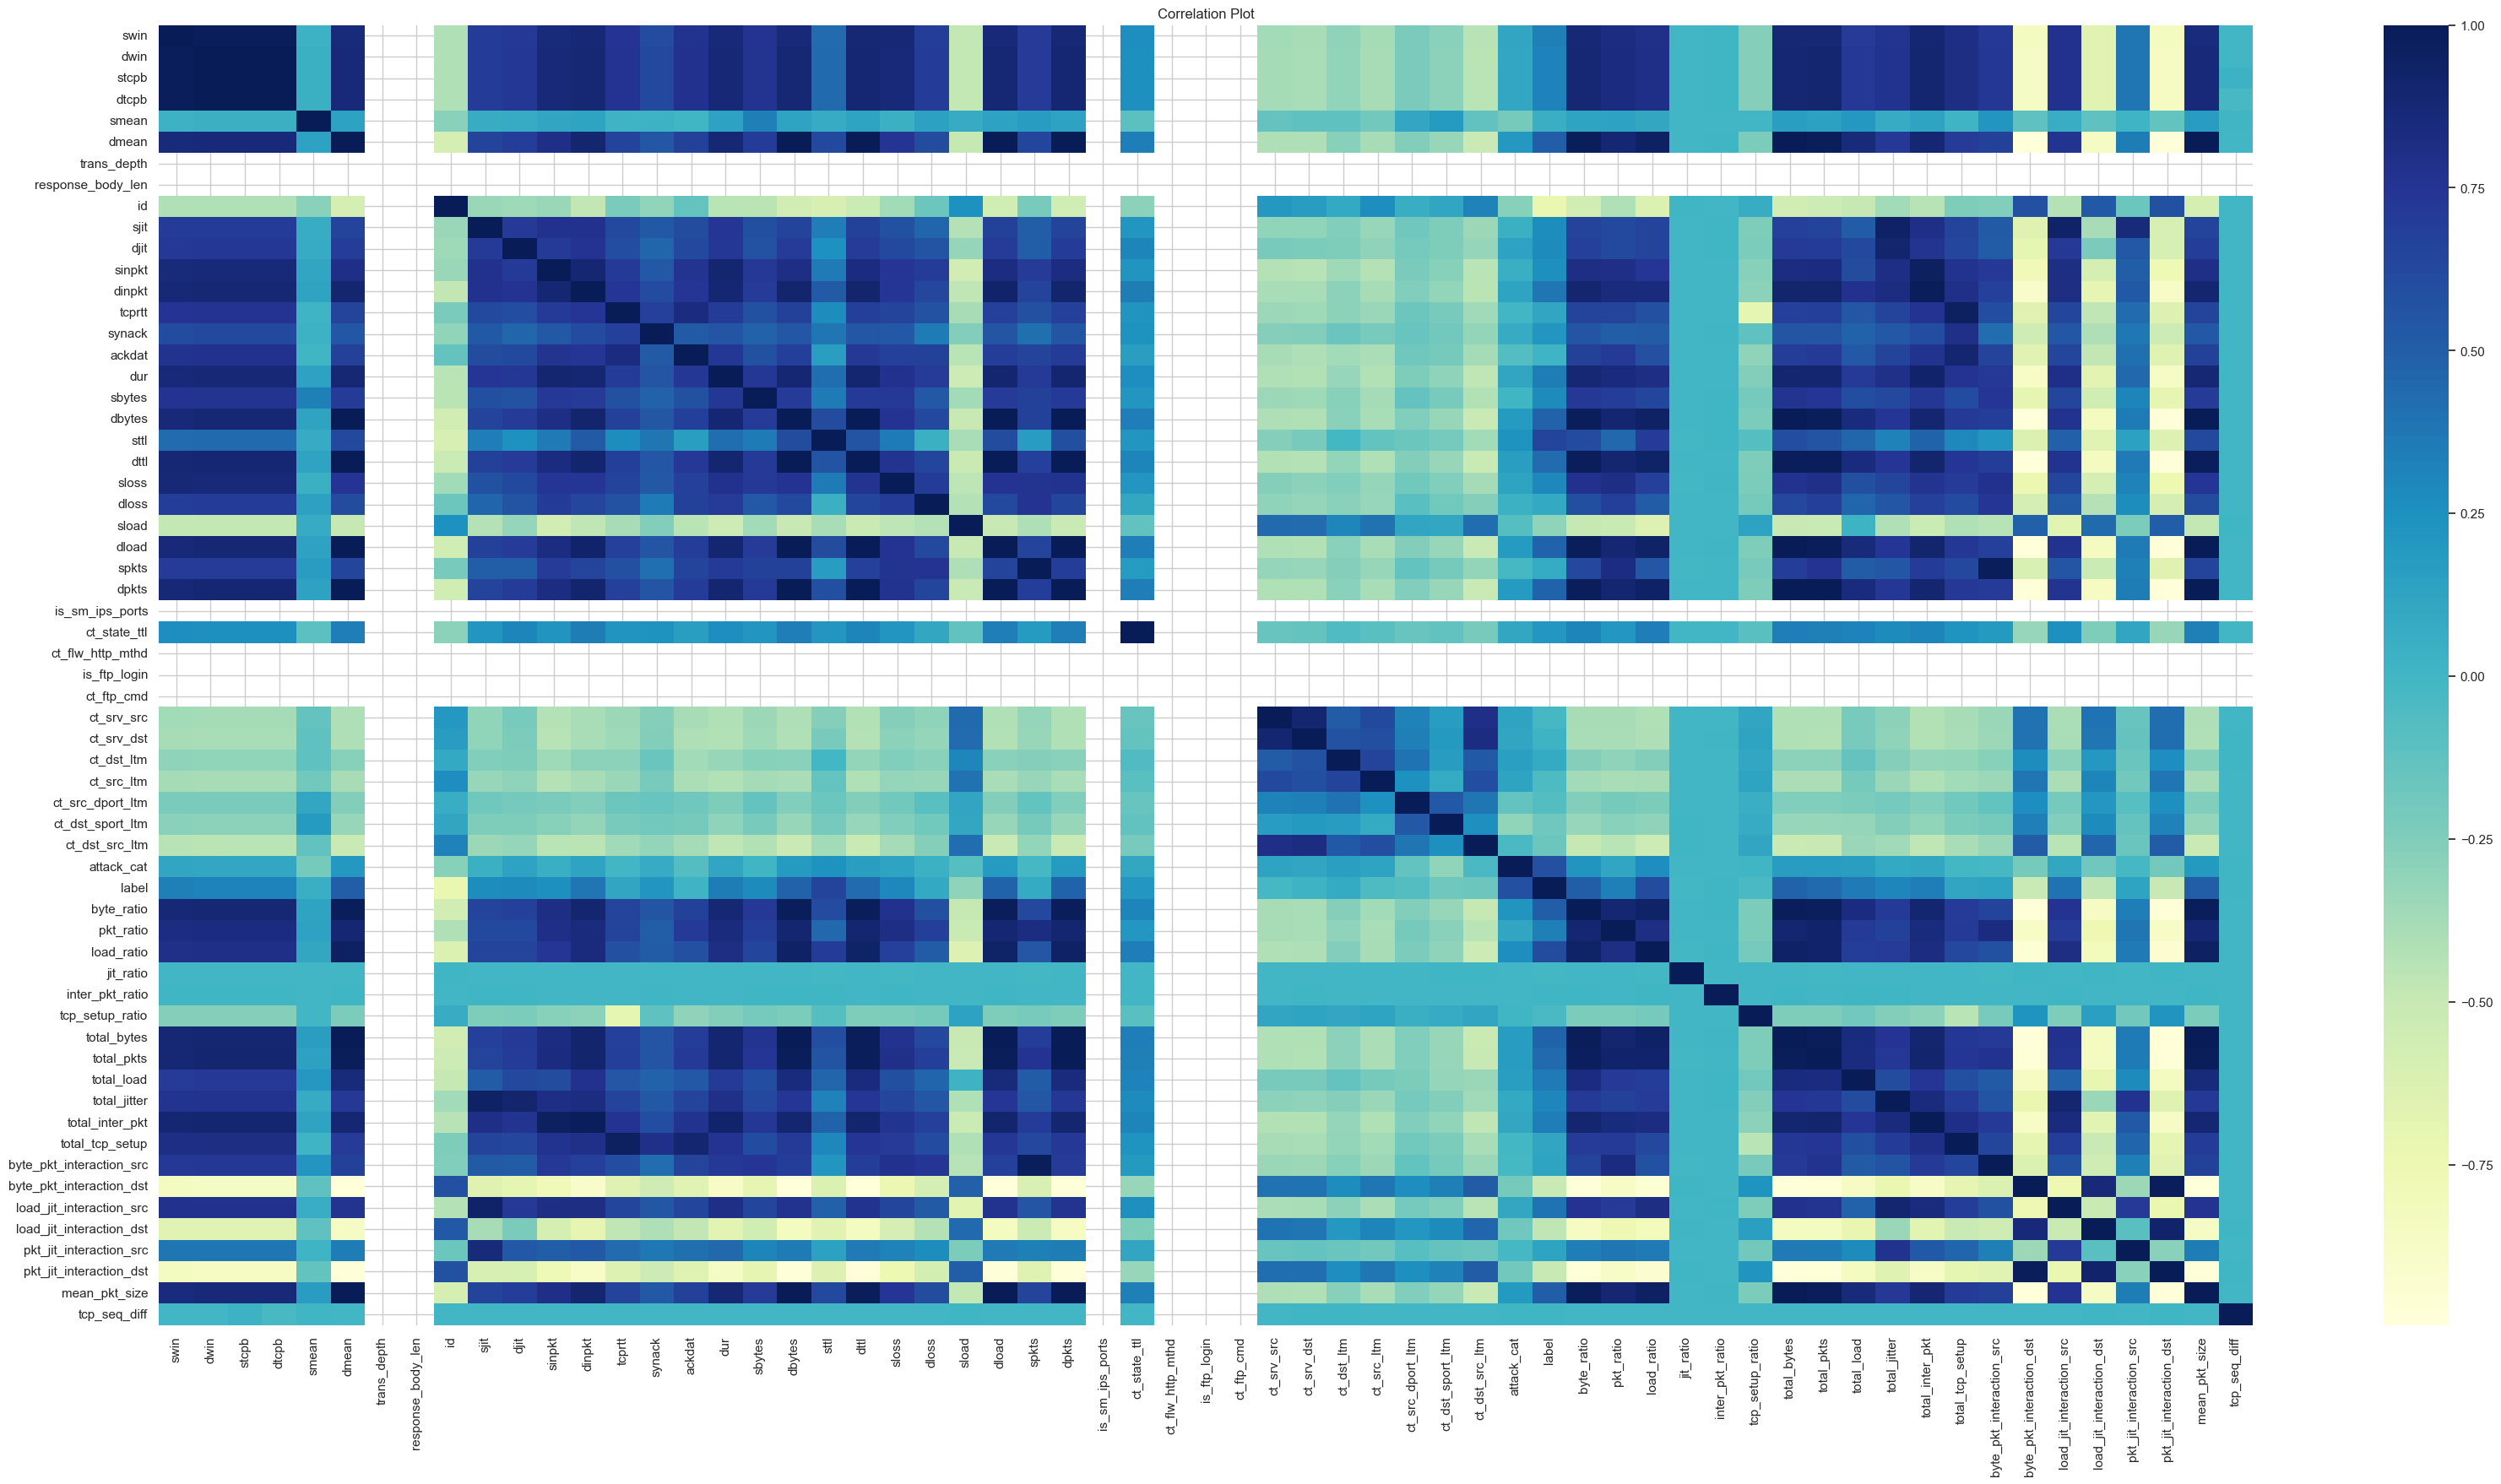

In [31]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(train_data.corr(),cmap='YlGnBu')

In [32]:
# Calculate the correlation matrix
correlation_matrix = train_data.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")


Highly correlated features:
swin and dwin
swin and stcpb
swin and dtcpb
swin and dmean
swin and sinpkt
swin and dinpkt
swin and ackdat
swin and dur
swin and sbytes
swin and dbytes
swin and dttl
swin and sloss
swin and dload
swin and dpkts
swin and byte_ratio
swin and pkt_ratio
swin and load_ratio
swin and total_bytes
swin and total_pkts
swin and total_jitter
swin and total_inter_pkt
swin and total_tcp_setup
swin and load_jit_interaction_src
swin and mean_pkt_size
dwin and stcpb
dwin and dtcpb
dwin and dmean
dwin and sinpkt
dwin and dinpkt
dwin and tcprtt
dwin and ackdat
dwin and dur
dwin and sbytes
dwin and dbytes
dwin and dttl
dwin and sloss
dwin and dload
dwin and dpkts
dwin and byte_ratio
dwin and pkt_ratio
dwin and load_ratio
dwin and total_bytes
dwin and total_pkts
dwin and total_jitter
dwin and total_inter_pkt
dwin and total_tcp_setup
dwin and load_jit_interaction_src
dwin and mean_pkt_size
stcpb and dtcpb
stcpb and dmean
stcpb and sinpkt
stcpb and dinpkt
stcpb and tcprtt
stcpb a

In [33]:
# Create a set of features to drop
features_to_drop = set()

# Iterate over the highly correlated features and add one of each pair to the drop list
for feature1, feature2 in highly_correlated_features:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # You can choose feature1 or feature2 to drop

# Drop the features from the DataFrame
train_data = train_data.drop(columns=features_to_drop)

# Print the remaining features
print("Remaining features after dropping highly correlated ones:")
print(train_data.columns)

Remaining features after dropping highly correlated ones:
Index(['swin', 'smean', 'trans_depth', 'response_body_len', 'id', 'sjit',
       'djit', 'tcprtt', 'synack', 'sttl', 'dloss', 'sload', 'is_sm_ips_ports',
       'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_srv_src', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'attack_cat', 'label', 'jit_ratio',
       'inter_pkt_ratio', 'tcp_setup_ratio', 'total_load',
       'byte_pkt_interaction_src', 'byte_pkt_interaction_dst', 'tcp_seq_diff'],
      dtype='object')


**Splitting the features in dependent and independent features**

In [34]:
x = train_data.drop(['attack_cat'], axis=1)
y = train_data[['attack_cat']]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

**Applying SMOTE to balance the unbalanced data**

In [35]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pandas as pd

# Define the desired number of samples for each class
desired_count = 15000

# Define the oversampling strategy for SMOTE
oversample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] < desired_count}

# Define the undersampling strategy for RandomUnderSampler
undersample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] > desired_count}

# Create the SMOTE and RandomUnderSampler objects
smote = SMOTE(sampling_strategy=oversample_strategy)
undersample = RandomUnderSampler(sampling_strategy=undersample_strategy)

# Combine SMOTE and RandomUnderSampler in a pipeline
pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

# Print class distribution before resampling
print("Before resampling:", y.value_counts())
print()

# Apply the pipeline to resample the dataset
x_resampled, y_resampled = pipeline.fit_resample(x, y)

# Print class distribution after resampling
print("After resampling:", y_resampled.value_counts())

Before resampling: attack_cat
6             56000
5             40000
3             33393
4             18184
2             12264
7             10491
0              2000
1              1746
8              1133
9               130
Name: count, dtype: int64

After resampling: attack_cat
0             15000
1             15000
2             15000
3             15000
4             15000
5             15000
6             15000
7             15000
8             15000
9             15000
Name: count, dtype: int64


**Checking Feature Importance**

In [36]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Check the number of missing values in both x and y
print("Missing values in x:", x.isnull().sum())
print("Missing values in y:", y.isnull().sum())

# Impute missing values instead of dropping rows
from sklearn.impute import SimpleImputer

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median' or 'most_frequent'

# Fit and transform the imputer on x and y
x_cleaned = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)
y_cleaned = pd.DataFrame(imputer.fit_transform(y), columns=y.columns)


# Print the shapes of cleaned x and y to ensure they are not empty
print("Shape of x_cleaned:", x_cleaned.shape)
print("Shape of y_cleaned:", y_cleaned.shape)

# Check if y_cleaned is empty
if y_cleaned.empty:
    print("Warning: Target variable 'y' is empty after dropping missing values.")
else:
    # Convert y_cleaned to a 1D array and ensure it's of appropriate dtype
    y_cleaned = y_cleaned.values.ravel()  # Flatten the array to ensure it is 1D

    # If y_cleaned is categorical (classification), ensure it's of integer type
    if y_cleaned.dtype == 'object':
        y_cleaned = pd.Categorical(y_cleaned).codes  # Convert to integer codes if categorical

    # Define the discrete features (if applicable)
    discrete_features = x_cleaned.dtypes == int

    # Function to compute mutual information scores
    def mi_score_maker(x, y, discrete_features):
        scores = mutual_info_regression(x, y, discrete_features=discrete_features)
        df = pd.DataFrame({
            'Features': x.columns,
            'Scores': scores
        })
        df = df.sort_values(['Scores'], ascending=False).reset_index(drop=True)
        return df

    # Compute mutual information scores
    mi_scores = mi_score_maker(x_cleaned, y_cleaned.astype('float64'), discrete_features)
    print(mi_scores)

Missing values in x: swin                        0
smean                       0
trans_depth                 0
response_body_len           0
id                          0
sjit                        0
djit                        0
tcprtt                      0
synack                      0
sttl                        0
dloss                       0
sload                       0
is_sm_ips_ports             0
ct_state_ttl                0
ct_flw_http_mthd            0
is_ftp_login                0
ct_ftp_cmd                  0
ct_srv_src                  0
ct_dst_ltm                  0
ct_src_ltm                  0
ct_src_dport_ltm            0
ct_dst_sport_ltm            0
label                       0
jit_ratio                   0
inter_pkt_ratio             0
tcp_setup_ratio             0
total_load                  0
byte_pkt_interaction_src    0
byte_pkt_interaction_dst    0
tcp_seq_diff                0
dtype: int64
Missing values in y: attack_cat    0
dtype: int64
Shape of x_clean

In [37]:
# Filter features with scores less than 0.001285
low_score_features = mi_scores[mi_scores['Scores'] < 0.01]

# Extract the feature names
low_score_feature_names = low_score_features['Features'].tolist()

# Print the list of low score feature names
low_score_feature_names

['is_ftp_login',
 'ct_ftp_cmd',
 'trans_depth',
 'response_body_len',
 'ct_flw_http_mthd',
 'is_sm_ips_ports']

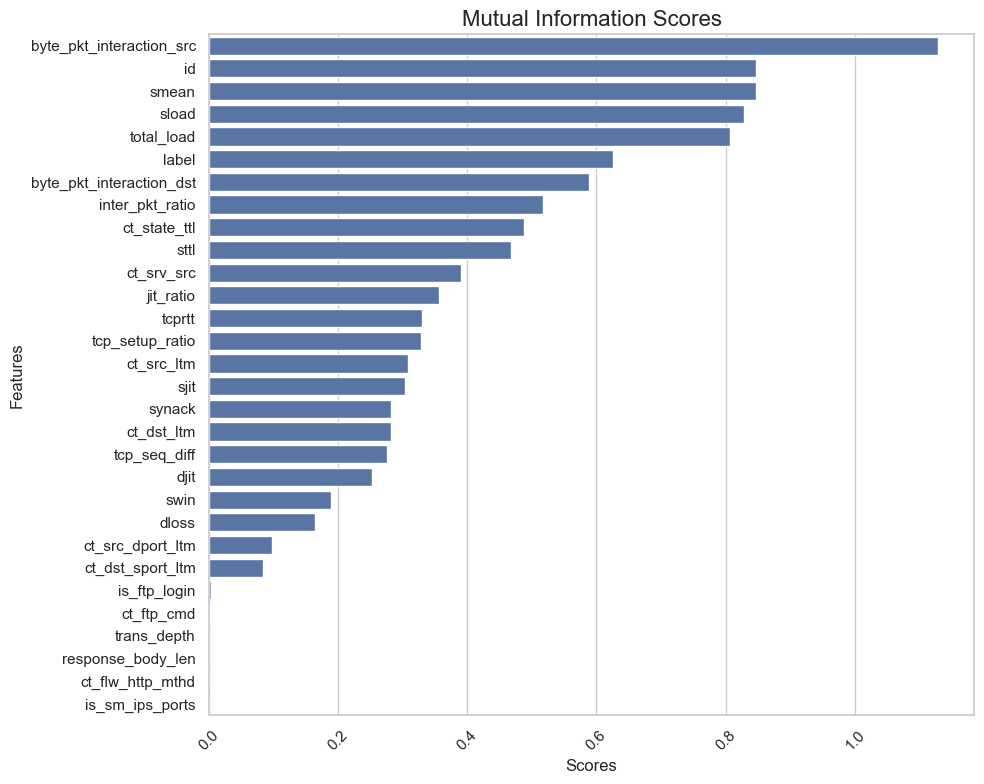

In [38]:
plt.figure(figsize=(10, 8))

# Create the barplot
sns.barplot(x='Scores', y='Features', data=mi_scores)

# Add a title
plt.title("Mutual Information Scores", fontsize=16)

# Rotate the y-axis labels (if needed)
plt.yticks(rotation=0)

# Rotate the x-axis labels (if needed)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

In [39]:
x.drop(low_score_feature_names,axis=1, inplace = True)

**Checking Variance captured by features**

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

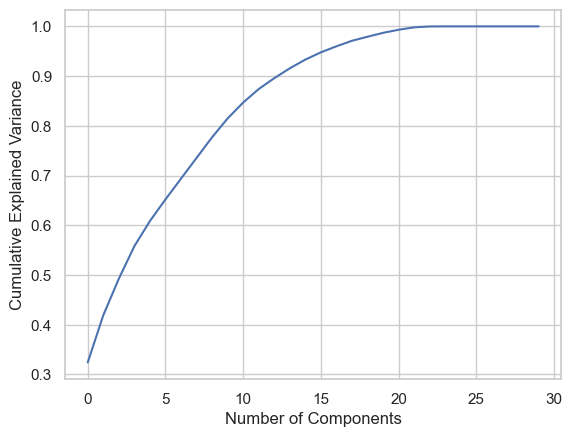

In [40]:

pca = PCA()
pca.fit(x_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# 2. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [41]:
X = train_data.drop(columns=['attack_cat', 'id', 'label'])
y = train_data['attack_cat']

X_train_scaled, X_val, y_train_scaled, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Features Shape:", X_train_scaled.shape)
print("Validation Features Shape:", X_val.shape)
print("Training Target Shape:", y_train_scaled.shape)
print("Validation Target Shape:", y_val.shape)

Training Features Shape: (140272, 28)
Validation Features Shape: (35069, 28)
Training Target Shape: (140272,)
Validation Target Shape: (35069,)


In [42]:
X_train_scaled.shape

(140272, 28)

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [43]:
train_data = content_features.merge(time_features, on='id') \
                       .merge(flow_features, on='id') \
                       .merge(basic_features, on='id') \
                       .merge(additional_features, on='id')
                      #  .merge(labels, on='id')
train_data.drop(columns=['proto', 'state', 'service'], inplace=True)
test_data = content_features_test.merge(time_features_test, on='id') \
                       .merge(flow_features_test, on='id') \
                       .merge(basic_features_test, on='id') \
                       .merge(additional_features_test, on='id')
test_data.drop(columns=['proto', 'state', 'service'], inplace=True)

print(train_data.shape)
print(train_data.columns.tolist())
print(test_data.shape)
print(test_data.columns.tolist())

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import skew

class NumericalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, exclude_columns=None):
        self.exclude_columns = exclude_columns if exclude_columns else []

    def fit(self, X, y=None):
        self.medians = {}
        self.bounds = {}
        self.skewness = {}
        numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
        self.numerical_columns = [col for col in numerical_columns if col not in self.exclude_columns]

        for col in self.numerical_columns:
            self.medians[col] = X[col].median()
            IQR = X[col].quantile(0.75) - X[col].quantile(0.25)
            self.bounds[col] = (
                X[col].quantile(0.25) - 1.5 * IQR,
                X[col].quantile(0.75) + 1.5 * IQR
            )
            self.skewness[col] = skew(X[col].dropna())

        return self

    def transform(self, X):
        X = X.copy()
        eps = 1e-5

        for col in self.numerical_columns:
            lower, upper = self.bounds[col]
            median = self.medians[col]
            skewness = self.skewness[col]

            # Handle outliers
            X[col] = X[col].apply(lambda x: median if x < lower or x > upper else x)

            # Handle skewness
            if skewness > 0:  # Positive skew
                X[col] = np.log(X[col] + eps)
            elif skewness < 0:  # Negative skew
                X[col] = np.log(X[col].max() + eps - X[col] + eps)

        return X

# Custom transformer for feature engineering
class FeatureEngineering(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # Feature generation
        X['byte_ratio'] = X['sbytes'] / (X['dbytes'] + 1)
        X['pkt_ratio'] = X['spkts'] / (X['dpkts'] + 1)
        X['load_ratio'] = X['sload'] / (X['dload'] + 1)
        X['jit_ratio'] = X['sjit'] / (X['djit'] + 1)
        X['inter_pkt_ratio'] = X['sinpkt'] / (X['dinpkt'] + 1)
        X['tcp_setup_ratio'] = X['tcprtt'] / (X['synack'] + X['ackdat'] + 1)

        X['total_bytes'] = X['sbytes'] + X['dbytes']
        X['total_pkts'] = X['spkts'] + X['dpkts']
        X['total_load'] = X['sload'] + X['dload']

        return X

class ToDataFrameTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        print("X.shape:", X.shape)
        self.columns = self.columns or [f"PC{i+1}" for i in range(X.shape[1])]
        return self

    def transform(self, X):
        # Ensure the output is a DataFrame
        return pd.DataFrame(X, columns=self.columns)

# Pipeline definition
pipeline = Pipeline(steps=[
    ('num_transform', NumericalTransformer(exclude_columns=['swim', 'dwim', 'stcpb', 'dtcpb', 'sttl', 'dttl'])),
    ('feature_engineering', FeatureEngineering()),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # Keep 95% of variance
    ('to_dataframe', ToDataFrameTransformer())  # Ensure output as pandas DataFrame
])

# Fit and transform the data
train_data_cleaned = pipeline.fit_transform(train_data)
test_data_cleaned = pipeline.transform(test_data)

# Print the resulting shape of the transformed data
print("Shape of the transformed data:", test_data_cleaned.shape)
print("Shape of train data", train_data_cleaned.shape)
print(labels.shape)

(175341, 39)
['swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'id', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']
(20583, 39)
['swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'id', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']
X.shape: (175341, 18)
Shape of the transformed data: (20583, 

In [44]:
merged_train_data = pd.concat([train_data_cleaned, labels], axis=1)
merged_train_data.drop(columns=['id', 'label'], inplace=True)
print(merged_train_data)

             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0       4.016836  0.207119 -2.296470 -0.810155 -0.051341  1.001093 -0.037155   
1       4.666557 -0.325369 -0.379706 -0.150088 -0.047952  2.016736  0.006969   
2       4.481674 -0.241130  1.015820 -1.295442 -1.694749 -0.873225 -0.074516   
3       4.131685  0.324217 -1.089027  0.025632 -0.289810  1.997285 -0.032429   
4       5.582727  0.800065  2.464128 -0.153351 -1.080521 -1.046739 -0.067761   
...          ...       ...       ...       ...       ...       ...       ...   
175336 -5.287468 -0.088475  1.603511 -1.523838  0.700836  0.255292 -0.000351   
175337  6.405598  2.992981  1.388508 -0.920039 -0.239293 -0.155839  0.051158   
175338 -5.428364  0.099681  1.674120  1.071211 -0.758681  0.084511  0.017597   
175339 -4.672714  1.267201 -0.364188 -1.364652  0.483821 -0.019266  0.004010   
175340 -4.672716  1.267206 -0.364184 -1.364656  0.483822 -0.019264  0.004010   

             PC8       PC9      PC10   

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN (Self Made)

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
from Algorithm.KNN import SelfKNN

X = merged_train_data.drop(columns=['attack_cat'])
y = merged_train_data['attack_cat']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize your custom KNN model
model = SelfKNN(k=5, n_jobs=-1, weights='uniform', verbose=True, metric='manhattan')

# Fit the model
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Fitting the model with training data...
Model fitting complete.
Using 16 cores for prediction.
Starting predictions...


100%|██████████| 35069/35069 [20:39<00:00, 28.30it/s]


Prediction completed in 1251.73 seconds.
Accuracy: 0.7915
Confusion Matrix:
 [[   33    12    88   223     9     0    33     2     0     0]
 [    9    21   100   176    11     0     1    28     3     0]
 [   10    18   572  1669    56    15    15    86    12     0]
 [   14    14   989  5083   225    15    89   233    14     3]
 [    8     4   119   380  2383    11   572   151     9     0]
 [    0     0    31   101    21  7836     0     6     5     0]
 [   11     1    10   134   636     0 10312    93     3     0]
 [    0     6   147   397    64     2    18  1454    10     0]
 [    0     1     3    54    24     1     9    71    63     1]
 [    0     0     0    23     3     0     0     0     0     0]]
Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.39      0.08      0.14       400
      Backdoor       0.27      0.06      0.10       349
           DoS       0.28      0.23      0.25      2453
      Exploits       0.62      0.76      0.

## KNN (Library)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1, weights='uniform', metric='manhattan')

X = merged_train_data.drop(columns=['attack_cat'])
y = merged_train_data['attack_cat']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred, output_dict=True)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_val, y_pred))

f1_score = class_report['macro avg']['f1-score']
print(f"F1-Score (Macro Average): {f1_score:.4f}")

KeyboardInterrupt: 

## B. Gaussian Naive Bayes (Self Made)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
from Algorithm.NaiveBayes import SelfGaussianNB

# Load dataset
X = merged_train_data.drop(columns=['attack_cat'])
y = merged_train_data['attack_cat']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize your custom Naive Bayes model
model = SelfGaussianNB()

# Train the model with the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

## Gaussian Naive Bayes (Library)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = GaussianNB()

# Memisahkan fitur dan label
X = merged_train_data.drop(columns=['attack_cat'])
y = merged_train_data['attack_cat']

# Membagi data menjadi pelatihan dan validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Melatih model menggunakan data pelatihan
model.fit(X_train, y_train)

# Membuat prediksi pada data validasi
y_pred = model.predict(X_val)

# Evaluasi model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred, output_dict=True)

# Menampilkan hasil
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_val, y_pred))

# Menghitung F1-Score
f1_score = class_report['macro avg']['f1-score']
print(f"F1-Score (Macro Average): {f1_score:.4f}")


Accuracy: 0.6064
Confusion Matrix:
 [[   5    0  235   41   72   32    1   14    0    0]
 [   0    0  229   35   30   25    0   28    2    0]
 [   0    0 1511  389  121  229    4  179   18    2]
 [   0    0 2074 2900  649  262    8  731   32   23]
 [   2    0  567  326 1907  584    2  231   14    4]
 [  18    0  437   83   13 7428    1   16    1    3]
 [   4    1  868 1674 1736  477 6311  125    4    0]
 [   0    0  331  174  304  104    3 1179    3    0]
 [   0    0   45   11   38    4    0  106   22    1]
 [   0    0    2   15    3    0    0    4    0    2]]
Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.17      0.01      0.02       400
      Backdoor       0.00      0.00      0.00       349
           DoS       0.24      0.62      0.35      2453
      Exploits       0.51      0.43      0.47      6679
       Fuzzers       0.39      0.52      0.45      3637
       Generic       0.81      0.93      0.87      8000
        Normal  

In [ ]:
# # Asumsikan test_data_cleaned sudah diproses sebelumnya
# # Kolom id harus ada di test_data_cleaned
# if 'id' not in test_data_cleaned.columns:
#     test_data_cleaned['id'] = range(0, len(test_data_cleaned))

# # Drop kolom yang tidak diperlukan untuk prediksi
# X_final_test = test_data_cleaned.drop(columns=['id'])

# # Gunakan model untuk memprediksi attack_cat
# y_final_pred = model.predict(X_final_test)

# # Buat DataFrame hasil prediksi
# submission = pd.DataFrame({
#     'id': test_data_cleaned['id'],
#     'attack_cat': y_final_pred
# })

# # Simpan ke file CSV
# submission.to_csv('submit2.csv', index=False)

# print("File submit.csv berhasil dibuat!")


## C. ID3 (Self Made)

In [50]:
# First, ensure we have the necessary imports
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from Algorithm.ID3 import SelfID3

# Train and evaluate the tree
dtree = SelfID3(verbose=True)

X = merged_train_data.drop(columns=['attack_cat'])
y = merged_train_data['attack_cat']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("sblm fit")
dtree.fit(X_train, y_train)
print("sesudah fit")

y_pred = dtree.predict(X_val)

# Evaluate
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

sblm fit


KeyboardInterrupt: 

## ID3 (Library)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

model = DecisionTreeClassifier(random_state=42, criterion='entropy')

X = merged_train_data.drop(columns=['attack_cat'])
y = merged_train_data['attack_cat']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.7777
Confusion Matrix:
 [[   57    14   157   106    34     1    19    12     0     0]
 [   20    30   107    89    24     1     4    70     4     0]
 [   98    80   832  1099   116    37    24   139    24     4]
 [  110    64  1155  4518   329    52   135   245    48    23]
 [   56    24   176   301  2237    24   638   143    34     4]
 [    0     3    37    76    24  7844     4     9     3     0]
 [   26     4    49   128   568     2 10352    58    13     0]
 [   10    78   200   252   131     6    48  1342    31     0]
 [    0     0    23    50    32     0    12    51    59     0]
 [    0     0     1    16     4     1     0     1     0     3]]
Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.15      0.14      0.15       400
      Backdoor       0.10      0.09      0.09       349
           DoS       0.30      0.34      0.32      2453
      Exploits       0.68      0.68      0.68      6679
       Fuzzers       0.64   

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [ ]:
# Type your code here

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`